### Generating the dataset

In [1]:
using PyPlot

In [2]:
srand(1)

# number of users
d1 = 20;

# number of items
d2 = 35;

# number of queries
n = 5000;

In [3]:
# generate the hidden ratings
ThetaS = rand(d1,1) * rand(1,d2)

# Need to have the sum of rows equaling 0
for i = 1:d1
    ThetaS[i,:] -= mean(ThetaS[i,:])
end

# Need to make the Frobenius norm <= 1
ThetaS = ThetaS / vecnorm(ThetaS);

In [4]:
y = []
X = []

for i = 1:n
    Xi = zeros(d1, d2)
    
    lin = rand(1:d1)
    c1 = rand(1:d2)
    c2 = rand(1:d2)
    while c2 == c1
        c2 = rand(1:d2)
    end
    
    Xi[lin,c1] = 1
    Xi[lin,c2] = -1
    Xi = Xi * sqrt(d1 * d2)
    
    push!(X, Xi)
    
    if ThetaS[lin,c1] > ThetaS[lin,c2]
        push!(y, 1)
    else
        push!(y, 0)
    end
end

### Helper functions

In [5]:
function nucNorm(A)
    return sum(svd(A)[2])
end

nucNorm (generic function with 1 method)

In [6]:
# make sure the matrix's rows are centered

function adjust(X)
    ans = copy(X)
    
    for i = 1:size(X)[1]
        ans[i,:] -= mean(ans[i,:])
    end
    
    return ans
end

adjust (generic function with 1 method)

In [7]:
# The objective function

function obj(Theta)
    ans = 0
    
    for i = 1:n
        ans = ans + log(1 + e^(trace(Theta' * X[i]))) - y[i] * trace(Theta' * X[i])
    end
    
    return ans / n
end

obj (generic function with 1 method)

In [8]:
# Compute the derivative of the objective loss

function deltaF(Theta)
    
    ans = zeros(d1,d2)
    
    for i = 1:n
        t1 = 1.0 / (1 + e^trace(Theta' * X[i]))
        t2 = e^trace(Theta' * X[i]) * X[i]
        t3 = y[i] * X[i]
        
        ans = ans + t1 * t2 - t3
    end
    
    return ans / n
    
end

deltaF (generic function with 1 method)

In [9]:
ThetaS

20×35 Array{Float64,2}:
 -0.0233217    0.00911495   0.0225369    …  0.0271573    -0.022272   
 -0.0342382    0.0133815    0.0330861       0.0398692    -0.0326971  
 -0.0308976    0.0120759    0.0298578       0.0359791    -0.0295068  
 -0.000781491  0.000305435  0.000755193     0.000910019  -0.000746315
 -0.0482783    0.0188689    0.0466537       0.0562184    -0.0461052  
 -0.0208451    0.00814701   0.0201436    …  0.0242734    -0.0199068  
 -0.0940558    0.0367604    0.0908908       0.109525     -0.0898222  
 -0.0987974    0.0386136    0.0954728       0.115046     -0.0943504  
 -0.0248659    0.0097185    0.0240292       0.0289555    -0.0237467  
 -0.0974893    0.0381023    0.0942088       0.113523     -0.0931012  
 -0.054912     0.0214616    0.0530642    …  0.0639431    -0.0524403  
 -0.0431892    0.0168799    0.0417359       0.0502924    -0.0412452  
 -0.041965     0.0164014    0.0405529       0.0488668    -0.0400761  
 -0.0763997    0.0298597    0.0738288       0.0889648    -0.072960

In [10]:
deltaF(ThetaS)

20×35 Array{Float64,2}:
 0.0130362   -0.0259293    -0.0273751    …  -0.0212686   0.029578  
 0.0164218   -0.00202116   -0.0173259       -0.0213126   0.00892759
 0.0312055   -0.00587205   -0.00877855      -0.0222205   0.0110508 
 0.0156475   -0.0261266    -0.0234985       -0.0287775   0.0444732 
 0.0138227   -0.0146708    -0.0134034       -0.0100886   0.0156391 
 0.0219006   -0.0195045    -0.029137     …  -0.0217592   0.0253107 
 0.00642427  -0.00426678   -0.00756146      -0.00837582  0.0045562 
 0.00662362   0.000202088   0.002184        -0.00480813  0.00707301
 0.00924303  -0.00294709   -0.0226881       -0.025802    0.0170811 
 0.00443224  -0.00221593    0.000347642     -0.00415028  0.00691211
 0.00267126  -0.00549689   -0.00736211   …  -0.0188618   0.0142095 
 0.0291455   -0.00964582   -0.00973085      -0.0226357   0.0205092 
 0.0171493   -0.00260014   -0.0139191       -0.0186283   0.006533  
 0.0175524    0.00133674   -0.0062336       -0.00725038  0.00743014
 0.00671498  -0.0140414 

In [11]:
X[1]

20×35 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0    0.0     0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0    0.0     0.0 

In [12]:
X[2]

20×35 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0   0.0   
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0

In [13]:
y[1], y[2]

(0,0)

In [14]:
function checkKKT(lamb, Theta)
    tot = 0
    
    for i = 1:n
        tot = tot + (e ^ trace(Theta' * X[i]) / (1 + e ^ trace(Theta' * X[i])) - y[i]) * X[i]
    end
    
    tot = tot / n
    
    U,S,V = svd(Theta)
    k = rank(Theta)
    U = U[:,1:k]
    V = V[:,1:k]
    
    tot = tot + lamb * U * V'
    
    println("The norm compared to lambda ", norm(tot) < lamb)
    
    println(norm(U' * tot))
    
    println(norm(tot * V))
    
end

checkKKT (generic function with 1 method)

In [15]:
# The proximal function
# return the matrix X that minimizes lambda * ||X||_nuc + 1/(2 lambda_k) || X - V ||_F^2
# equivalent to (lamda*lambda_k) ||X||_nuc + 1/2 || X - V ||_F^2

function prox(lambda, V)
    
    A,S,B = svd(V)
    S = max(S - lambda, 0)
    
    return adjust(A * diagm(S) * B')
    
end

prox (generic function with 1 method)

In [16]:
# The proximal objective

function proxObj(lambda, X, V)
    return lambda * nucNorm(X) + 1 / 2 * norm(X - V)^2
end

proxObj (generic function with 1 method)

In [17]:
# # The proximal function
# # return the matrix X that minimizes lambda * ||X||_nuc + 1/(2 lambda_k) || X - V ||_F^2
# # equivalent to (lamda * lambda_k) ||X||_nuc + 1/2 || X - V ||_F^2

# function prox(lambda, V)
    
#     X = adjust(rand(d1,d2))
#     Xmin = copy(X)
    
#     step = 0.05
#     eps = 1e-6
#     numSteps = 0
    
#     while numSteps < 500
#         numSteps += 1
    
#         # a subgradient of lambda * ||X||_nuc is AB' where X = ASB'
#         A,_,B = svd(X)
#         k = rank(X)
#         A = A[:,1:k]
#         B = B[:,1:k]

#         t1 = lambda * A * B'

#         # the derivative of 1 / 2 || X - V ||_2^2 is (X - V)
#         t2 = X - V
        
#         newX = X - step * (t1 + t2)
#         newX = adjust(newX)
        
#         if proxObj(lambda, newX, V) < eps
#             return newX
#         end
        
#         if proxObj(lambda, newX, V) < proxObj(lambda, Xmin, V)
#             Xmin = copy(newX)
#         end
        
#         X = copy(newX)
#     end
    
#     return Xmin
    
# end

##### As a sanity check, make sure that our gradient steps indeed decreases obj loss

In [18]:
Theta = adjust(rand(d1,d2))

println("Hidden loss ", obj(ThetaS))
println("Current loss ", obj(Theta))

for stp = 1:500
    alpha = 0.05

    newTheta = Theta - alpha * deltaF(Theta)
    newTheta = adjust(newTheta)

    if stp % 30 == 0
        println("Loss after ", stp, " steps: ", obj(newTheta))
    end
    
    Theta = copy(newTheta)
end

Hidden loss 0.39822467163585396
Current loss 4.753267448248863
Loss after 30 steps: 3.5645739905502967
Loss after 60 steps: 2.5956517714670118
Loss after 90 steps: 1.8523120048975634
Loss after 120 steps: 1.3091218753534755
Loss after 150 steps: 0.9294292138878778
Loss after 180 steps: 0.6718086548585175
Loss after 210 steps: 0.49877025602978237
Loss after 240 steps: 0.38177301537836306
Loss after 270 steps: 0.3020287694381274
Loss after 300 steps: 0.24701000400288317
Loss after 330 steps: 0.2080568087976781
Loss after 360 steps: 0.1796385444960353
Loss after 390 steps: 0.1584126397827134
Loss after 420 steps: 0.1422054218195035
Loss after 450 steps: 0.1295362039814354
Loss after 480 steps: 0.1194063579363674


#### Let's test out the algorithm

In [19]:
curTheta = adjust(rand(d1,d2))
lambda = 0.2   # the regularization parameter
lambda_k = .05   # the step size

LF = []
objVal = []
C = []

for steps = 1:500
    # first, go in the direction of f
    V = curTheta - lambda_k * deltaF(curTheta)
    newTheta = prox(lambda * lambda_k, V)
#     newTheta = adjust(V)
    
    checkKKT(lambda, newTheta)
    println()
    
    if steps % 10 == 0
        println("f + g = ", obj(curTheta) + lambda * nucNorm(curTheta))
        println("f = ", obj(curTheta))
        println("g = ", lambda * nucNorm(curTheta))
        println()
    end
    
    push!(objVal, obj(newTheta) + lambda * nucNorm(newTheta))
    push!(LF, vecnorm(ThetaS - newTheta)^2)
#     push!(C, trace(ThetaS * newTheta') / norm(ThetaS) / )
    
    
    curTheta = copy(newTheta)
end

The norm compared to lambda false
0.7028062160573688
0.5690265946758906

The norm compared to lambda false
0.6986178023014864
0.565408249628529

The norm compared to lambda false
0.6943900005419754
0.5618171602181836

The norm compared to lambda false
0.6901236830208644
0.5582547828701874

The norm compared to lambda false
0.6858197927477461
0.554722546250005

The norm compared to lambda false
0.6814793297680589
0.5512218488081568

The norm compared to lambda false
0.6771033400961766
0.5477540567430217

The norm compared to lambda false
0.6726929077740956
0.5443205021783025

The norm compared to lambda false
0.6682491496168489
0.5409224810820548

The norm compared to lambda false
0.6637732113953781
0.5375612501999393

f + g = 9.554970528524004
f = 3.8774418300644684
g = 5.677528698459536

The norm compared to lambda false
0.6592662637407634
0.5342380222302772

The norm compared to lambda false
0.6547294961114923
0.5309539587940212

The norm compared to lambda false
0.6501641077745264
0

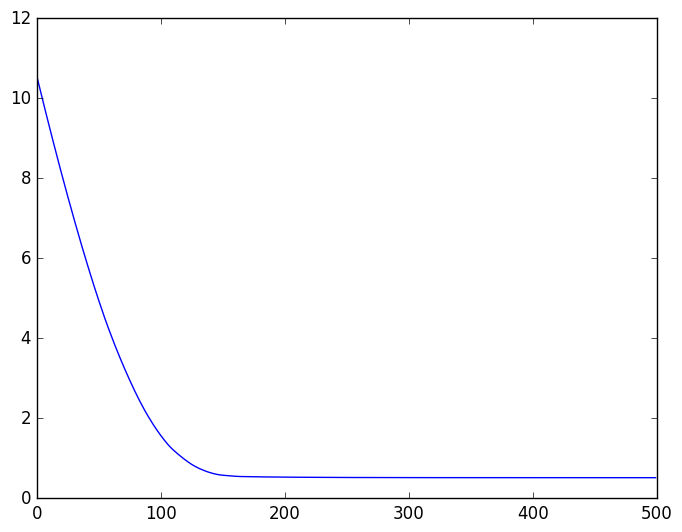

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e8abfd0>

In [20]:
# plotting the objective 
plot(objVal)

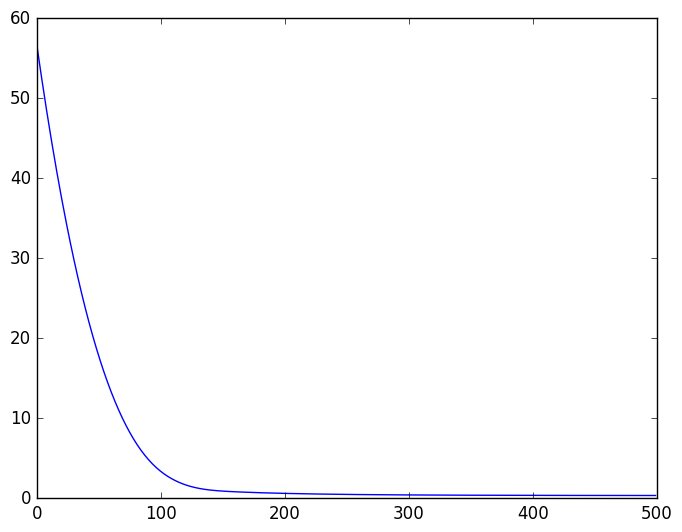

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ea5e910>

In [21]:
# plotting the loss function
plot(LF)

In [23]:
newLF = []
for i = 1:500
    push!(newLF, log(LF[i]))
end

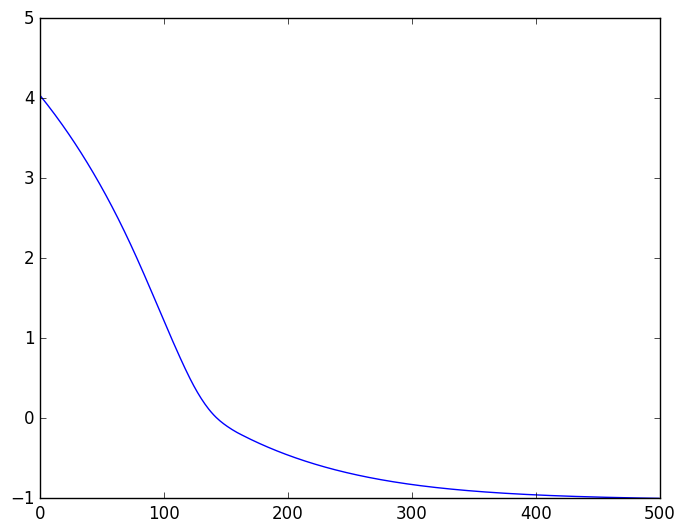

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31eb24310>

In [24]:
plot(newLF)

In [27]:
norm(ThetaS - curTheta)^2

0.35742990586371004